# <font color="blue">1.Clustering</font>
## 1) 데이터 수집
- 데이터는 UCI Machine Learning Repisitory의 'Wine' Data Set을 사용하였다.(https://archive.ics.uci.edu/ml/datasets/Wine)
- 해당 데이터는 서로 다른 3가지 재배종에 의해서 생성된 와인에 대하여 각각의 와인에 포함된 13가지 화학 성분의 양을 기록한 데이터 이다. 178가지의 서로 다른 와인 종류가 존재하며, 와인 생성에 사용된 3가지 재배종에 의해서 분류 된다. 이때 각 종에 대한 와인의 개수는 각각 59,71,48개이다.

## 2) 데이터 전처리

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mlp
import warnings
import random
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns


warnings.filterwarnings(action='ignore') 

random.seed(2022)

데이터가 CSV로 되어있지 않아 추가적인 수정을 통해서 wine.data를 만들었다
Classify 항목은 사용된 품종에 관한 정보로 해당 과제에서 target이 되므로 미리 drop하여 df_label로 저장해 두었다
- Alchol : 알콜 농도
- Malic acid : 말산. 포도주의 시큼한 맛에 기여. 포도 열매가 성숙해 감에 따라 감소하는 경향을 보임
- Ash : 음식물 속에 들어있는 무기물, 혹은 그것의 전체 분량에 대한 비율을 이루는 용어
- Alcalinity of ash : 알칼리성 무기물
- Magnesium : 마그네슘 
- Total phenols : 페놀의 총량. 와인에는 다양한 종류의 페놀성 화학 성분이 포함되어 있으며, 이는 와인의 맛, 향 그리고 바디감에 영향을줌
- Flavonoids : 레드 와인의 페놀 성분 중 최대 90퍼센트 비율을 나타내는 폴리 페놀 성분을의미. 떫은 맛을 내는 탄닌이 플라보노이드에 속함
- Nonflavanoid phenols : 위를 제외한 나머지 10퍼센트의 페놀 성분들
- Proanthocyanins : 프로안토시아닌으로 심장혈관 질환의 발병률을 낮추는데 도움을 주는 성분
- Color intensity : 발색의 강도
- Hue : 와인을 잔에 따라 흔들었을 때 와인과 글라스의 경계 부분의 색깔이 다른 정도.
- OD280/OD315 of diluted wines : 다양한 와인의 단백질 함량을 결정할 수 있는 단백질 농도를 결정하는 방법. (O.D는 Optical Density로 280nm 단백질의 흡광도 / 350nm 단백질의 흡광도 ) 
- Proline : 프롤린(아미노산 중 하나)

In [7]:
df = pd.read_csv('wine.data', sep=',')
df = df.replace({'Classify': {1:0,2:1,3:2}}) # 1,2,3으로 분류되어 있는 것을 0,1,2로 변환

df_label = df['Classify'] # 라벨을 df_label에 저장하고 
# df = df.drop('Classify', axis= 1)# 우리가 사용할 데이터에서 제거

df.describe()

,Classify,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline of diluted wines
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


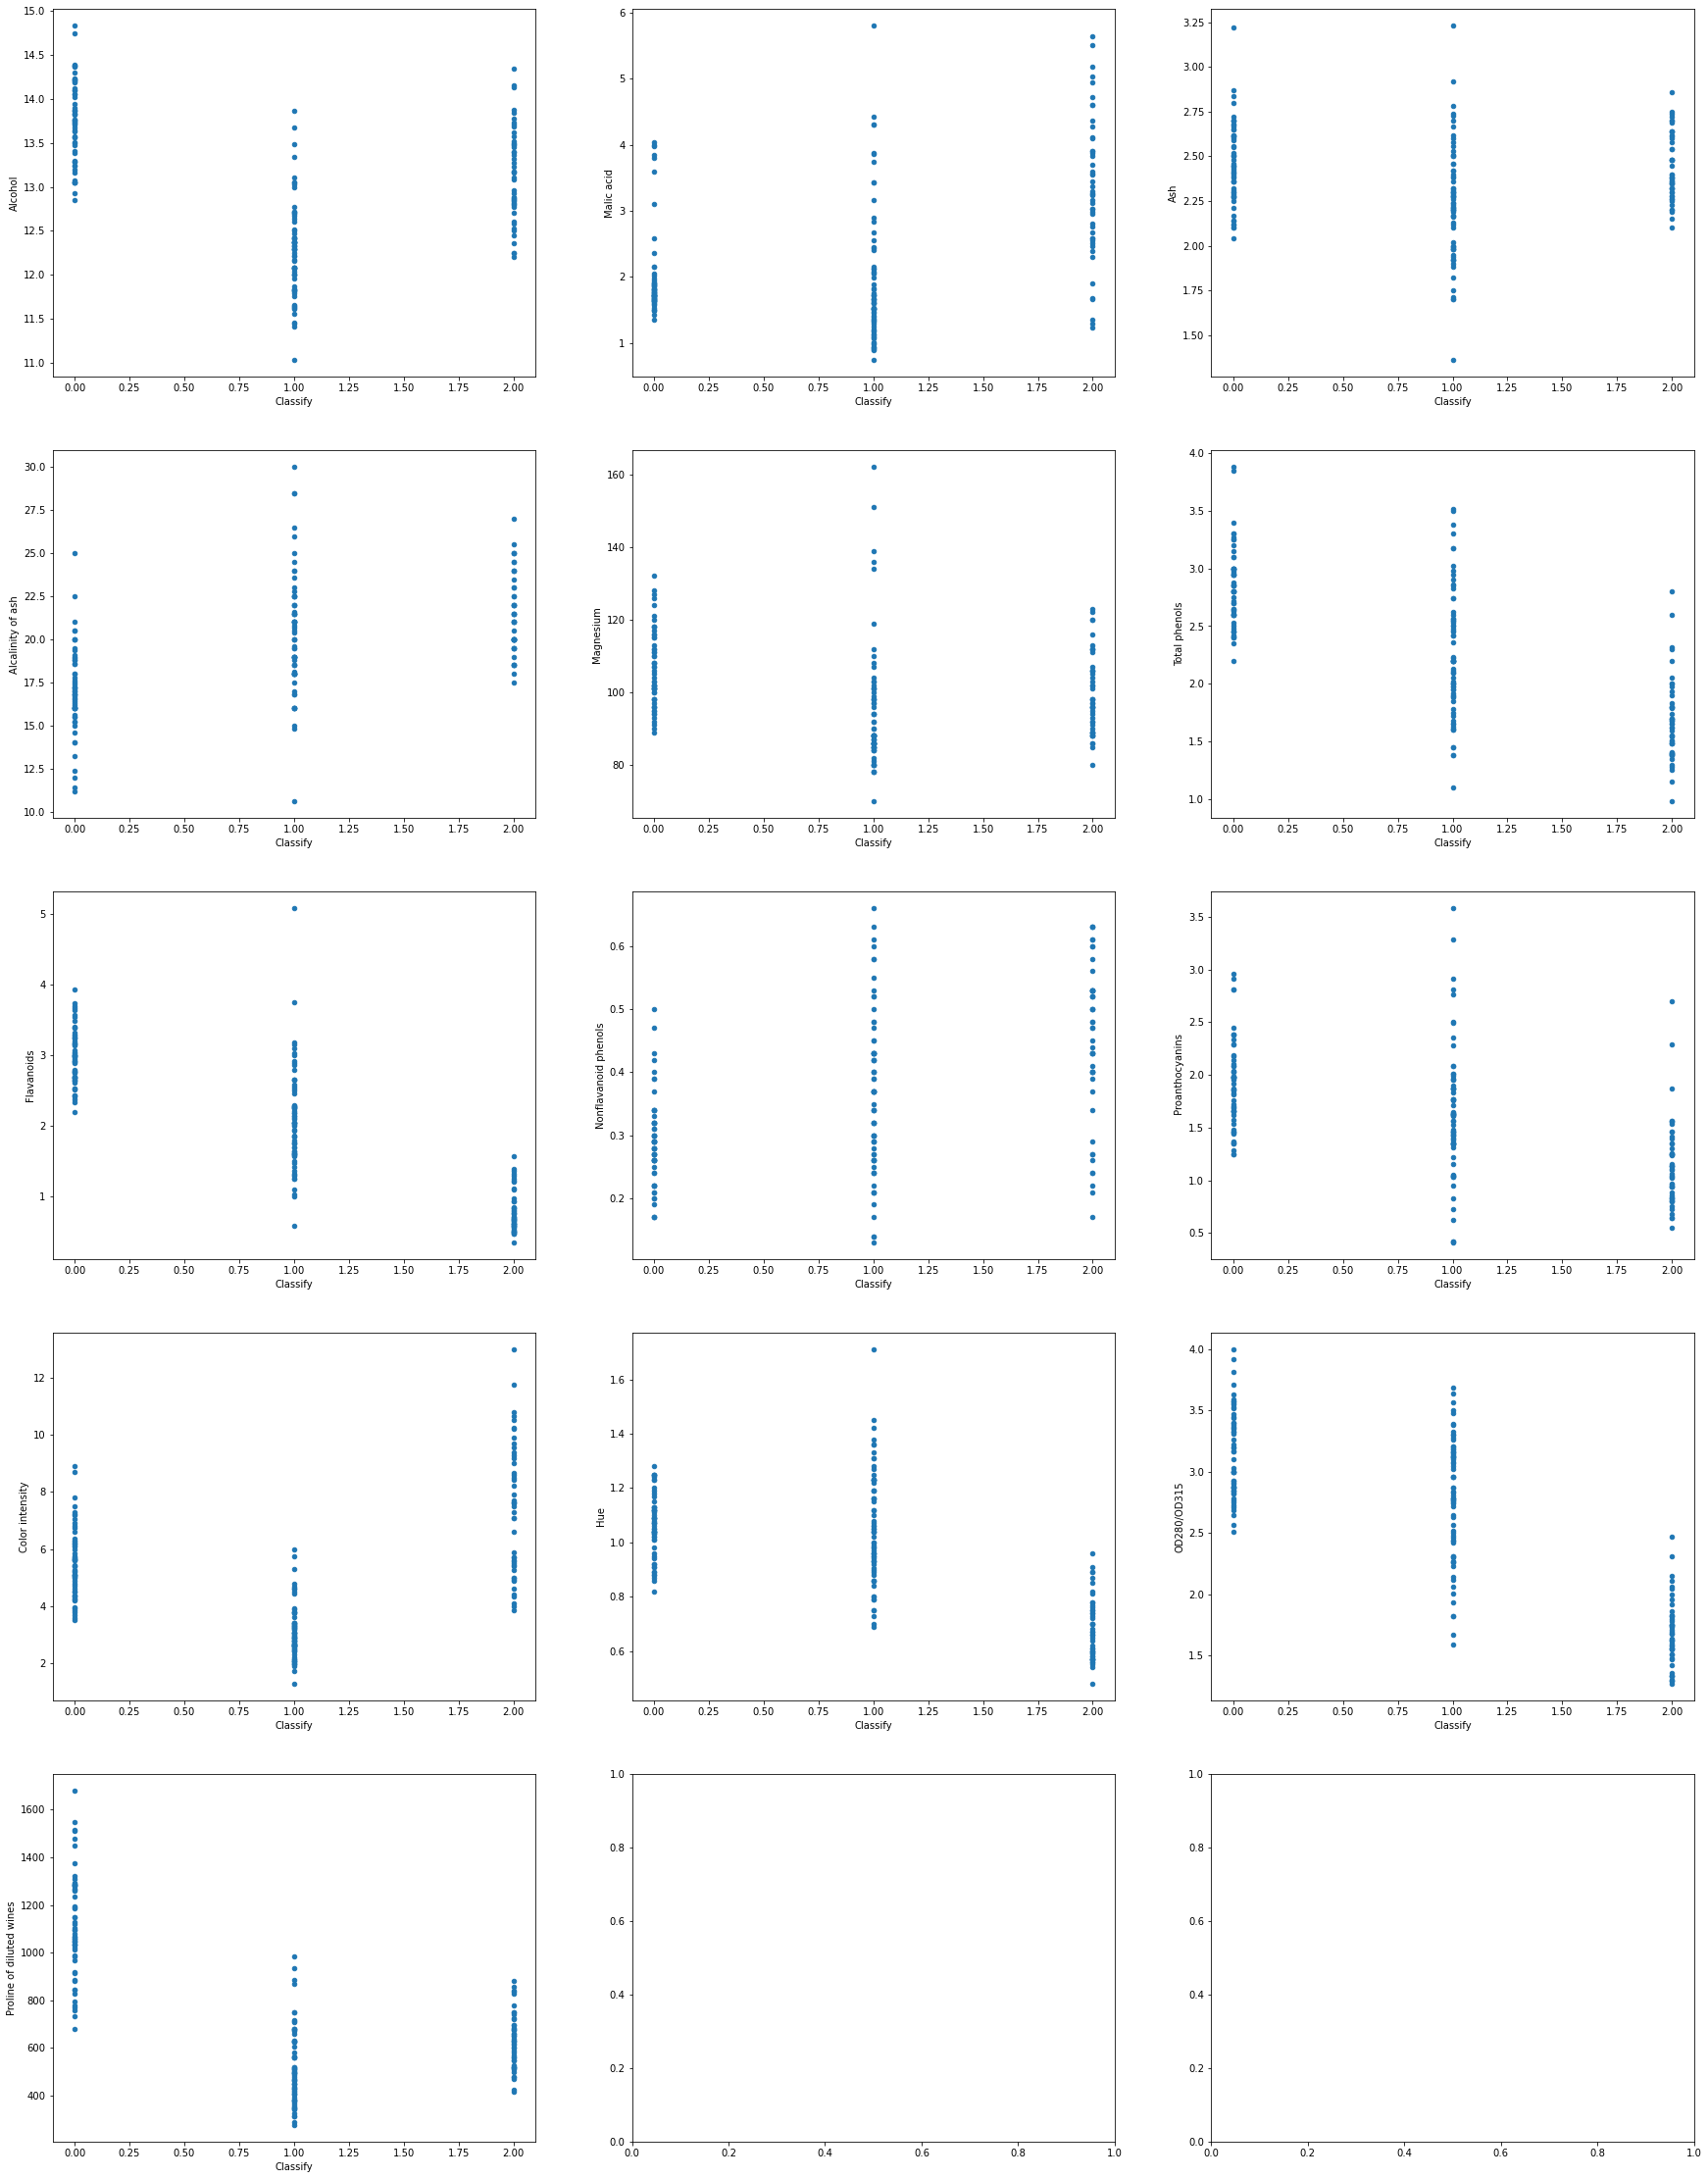

In [8]:
fig, axes = plt.subplots(5, 3)

for i in range(13):
    col = i//3
    row = i % 3
    df.plot(x='Classify', y=i+1, kind = 'scatter', ax = axes[col,row])

plt.rcParams['figure.figsize'] = [30, 40]

warnings.filterwarnings(action='ignore') 

위의 plot으로 볼때, 변수간의 scale이 크게 달라 정규화를 진행하였다.  
추가적으로 Ash, Nonflavanoid phenols 변수는 class를 분류하는데 설명력이 적다고 판단하여 제거 하고 진행하였다.

In [9]:
df = df.drop('Classify', axis= 1)# 우리가 사용할 데이터에서 제거

df = df.drop('Ash', axis= 1)
df = df.drop('Nonflavanoid phenols', axis= 1) #설명력이 작은 데이터 삭제


scaler = StandardScaler()   
df_scale = pd.DataFrame(scaler.fit_transform(df)) #표준화 진행


In [10]:
df_for_PCA = pd.DataFrame(df_scale)
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_for_PCA)
df_PCA = pd.DataFrame(df_PCA, columns=["x", "y"])



## 3) 군집화 분석
### (1) K-Means
K-Means는 기본적으로 K개의 군집으로 군집화를 진행하기 때문에 군집의 개수를 정해주어야 한다. 원본 데이터에서는 3개를 가지고 진행하지만 원래의 Clustering 과정에서는 군집의 개수를 정하는 것이 중요하다. 따라서 Elbow method를 이용하여 적절한 군집의 개수를 확인하였고, 3 가지로 분류하는 경우 충분히 설득력이 있다는 것을 확인하였다.

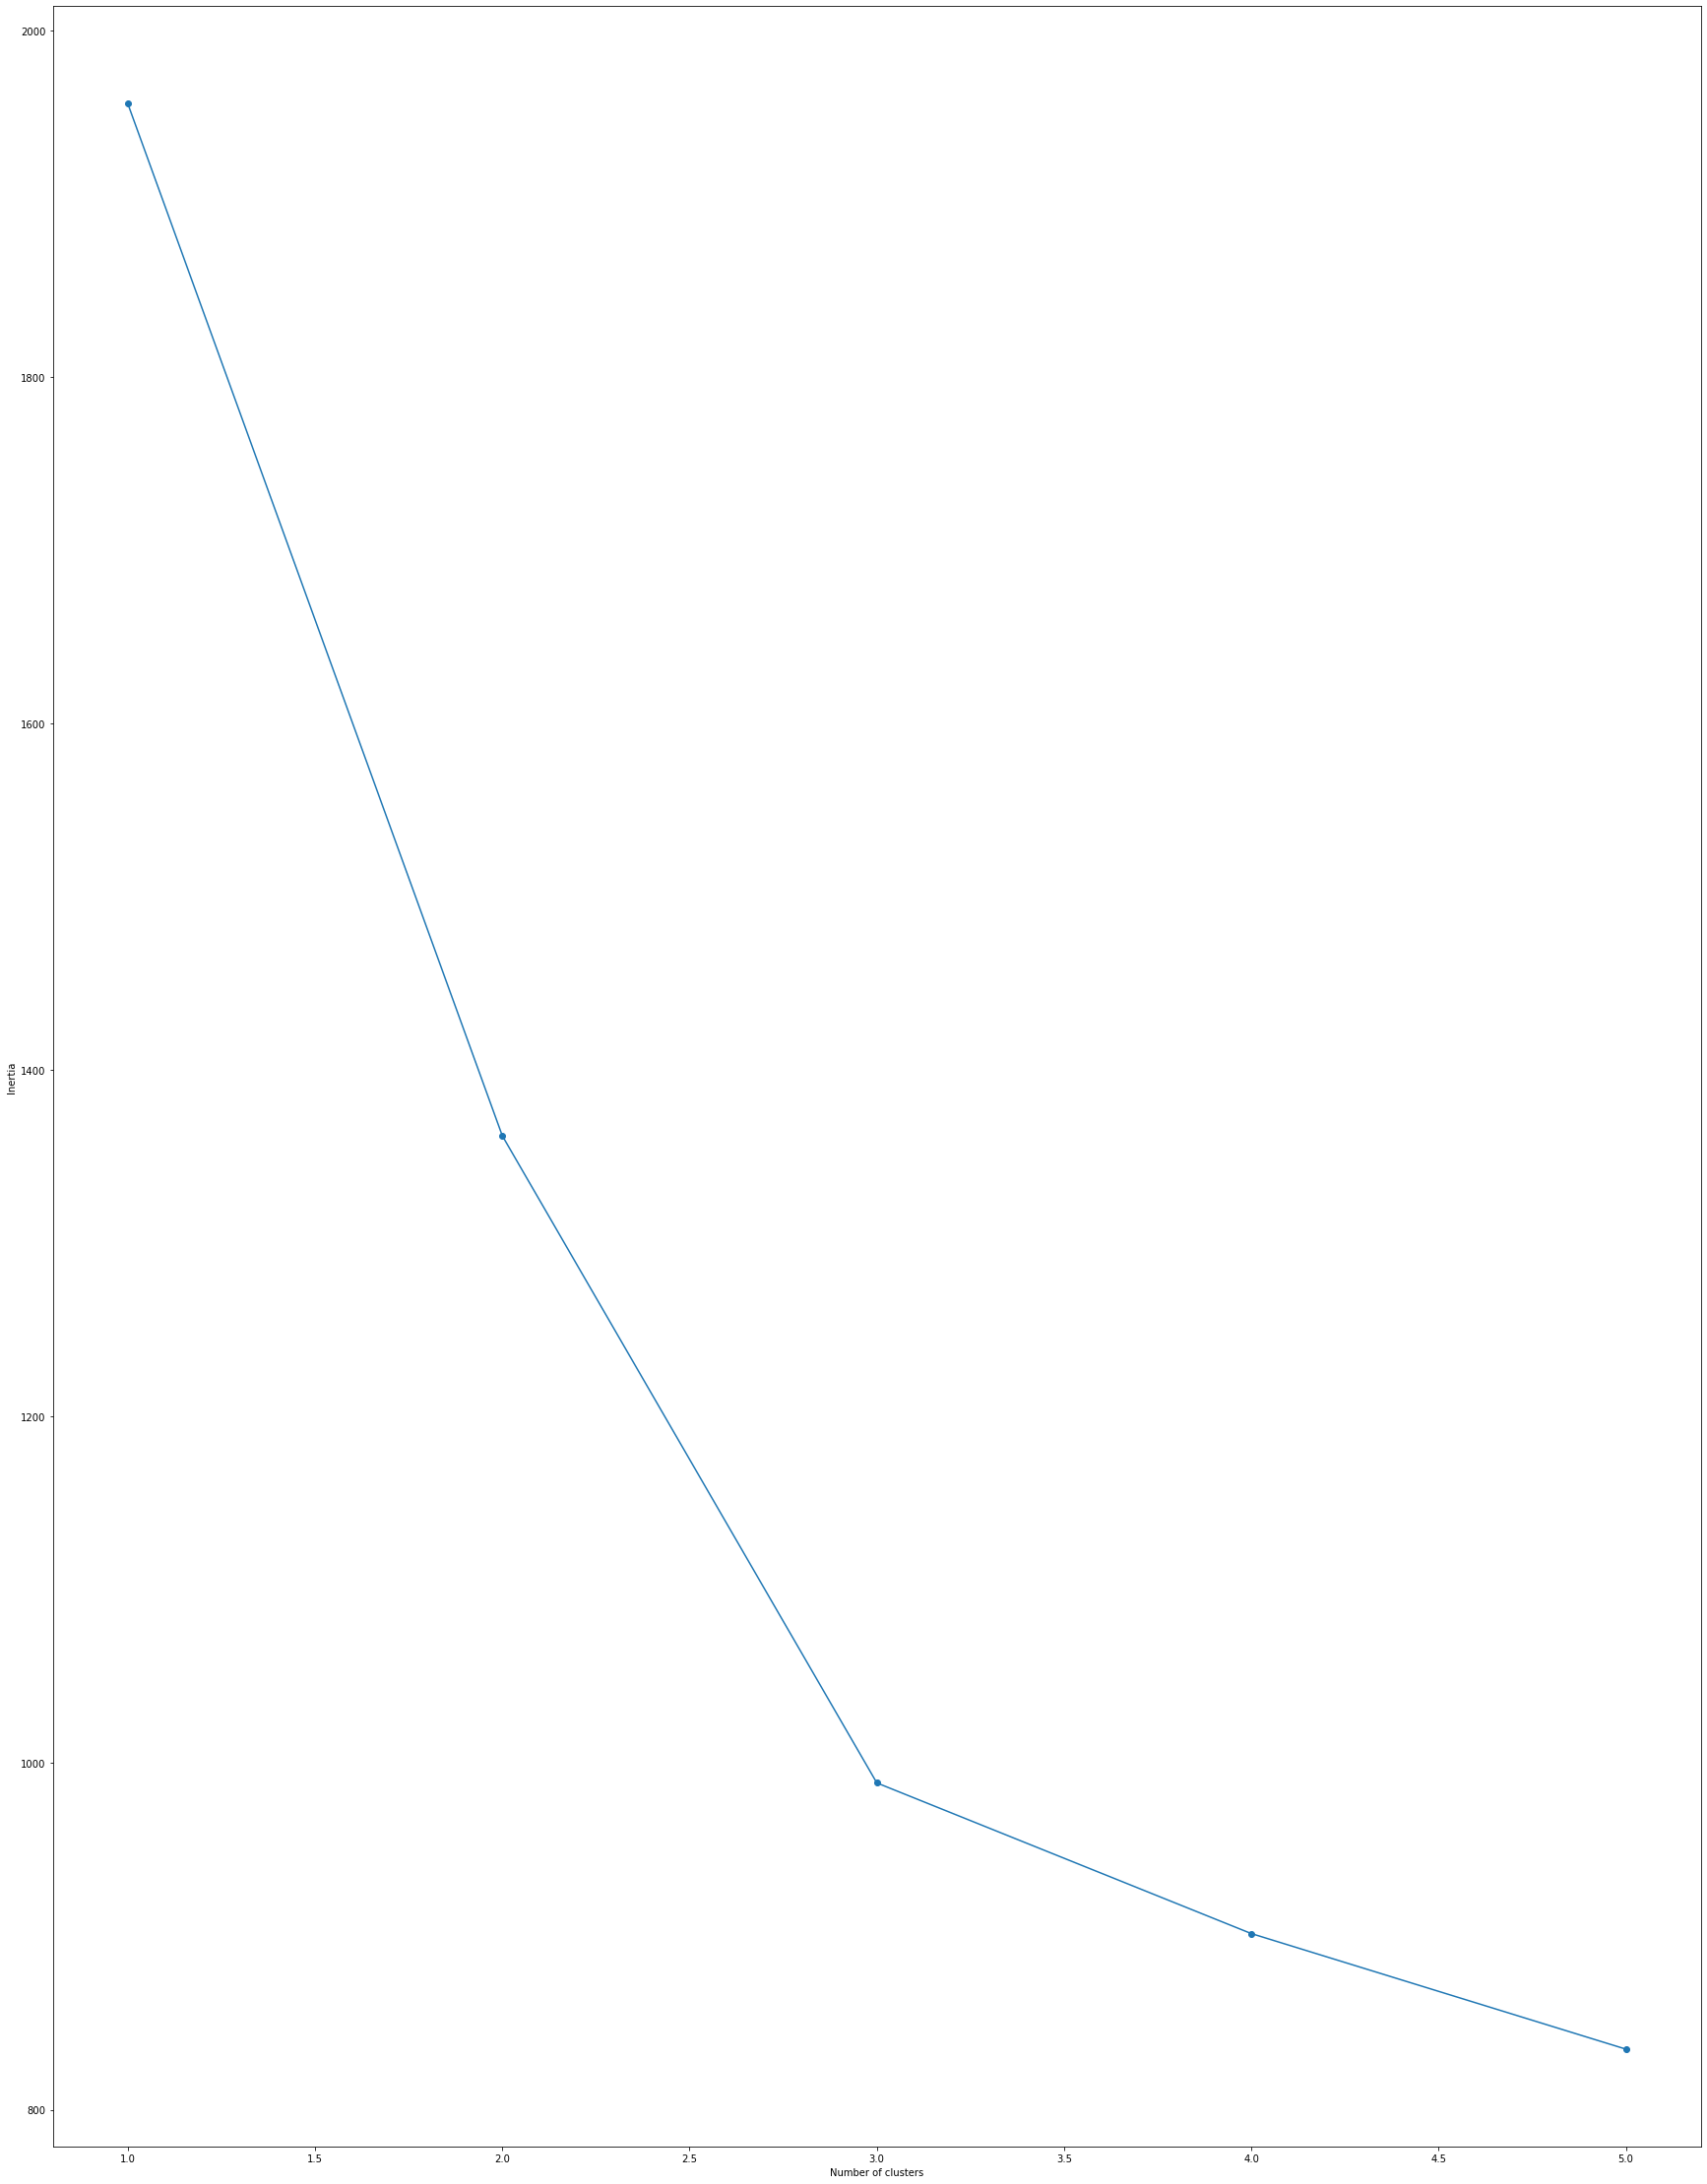

In [11]:
inertia = []
for i in range(1,6):
    kmeans_plus = KMeans(n_clusters = i,random_state = 15,  n_init=100)
    kmeans_plus.fit(df_scale)
    inertia.append(kmeans_plus.inertia_)
    
plt.plot(range(1,6), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

추가적으로 군집을 각각 2~6 으로 수행했을 때의 silhoutte score를 확인해 보면 3개로 분류하는 경우 0.6113655707313156 으로 가장 높다는 것도 확인 할 수 있다.


In [12]:
for i in range(2,6):
    model = KMeans(n_clusters = i, random_state = 15,  n_init=100)
    model.fit(df_scale)
    df_scale['cluster'] = model.fit_predict(df_scale)
    df_cluster = df_scale['cluster']
    df_scale = df_scale.drop('cluster', axis= 1)
    merged = pd.concat([df_PCA, df_cluster], axis =1)
    score_samples = silhouette_samples(merged, df_cluster)
    merged['silhoutte_coeff'] = score_samples
    
    average_score = silhouette_score(merged, merged['cluster'])
    print(i , " = " , average_score)
    merged  = merged.drop('silhoutte_coeff', axis= 1)


2  =  0.4757718083398866
3  =  0.6113655707313156
4  =  0.5093657843743317
5  =  0.5119133136834318


K-Means를 이용해서 2~5개의 군집화를 시도하면 다음과 같이 확인할 수 있다. 

findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.


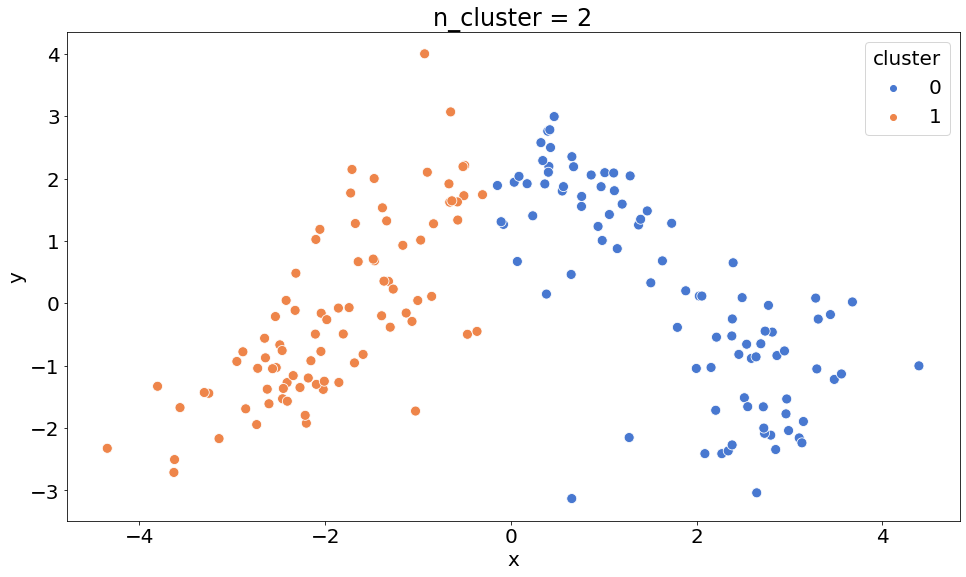

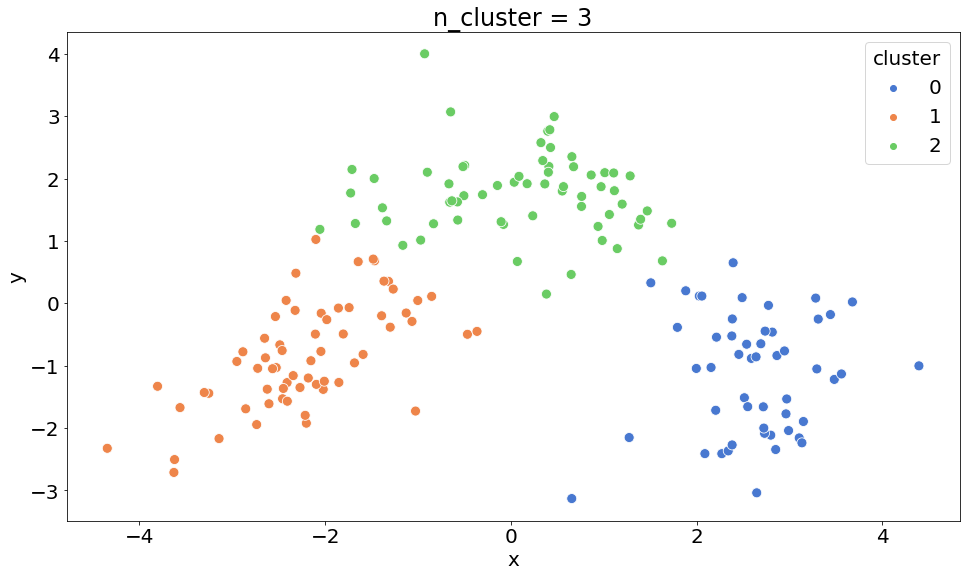

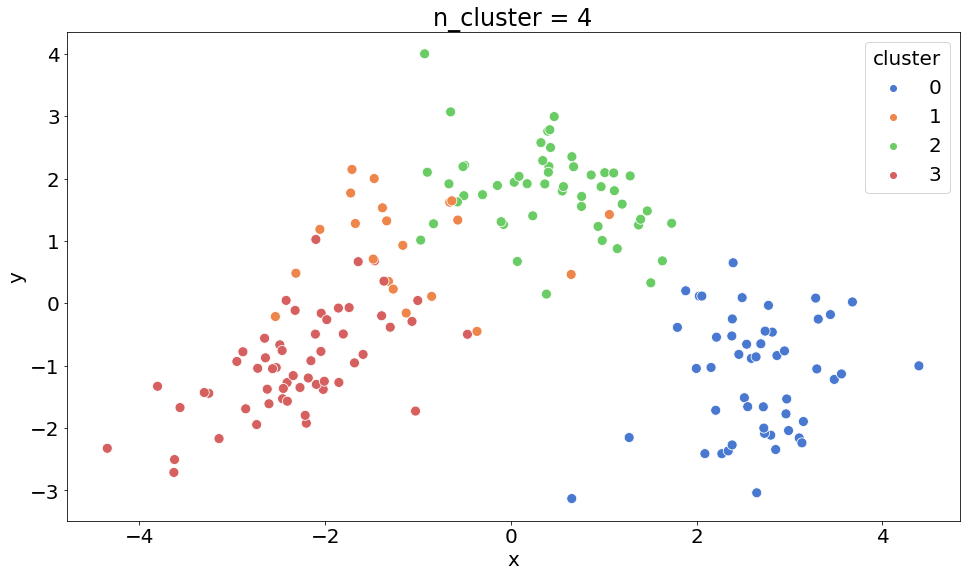

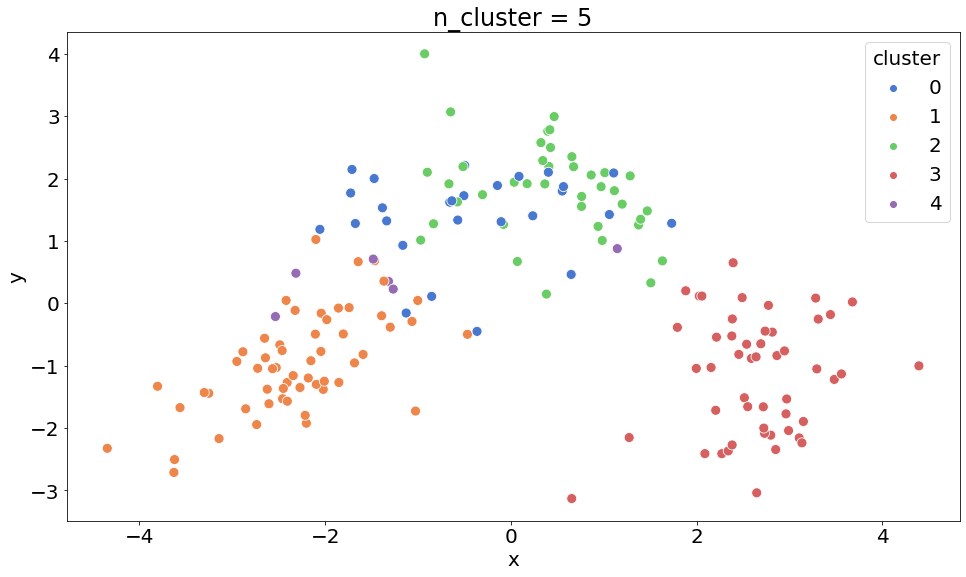

In [13]:
for i in range(2,6):
    model = KMeans(n_clusters = i, random_state = 300,  n_init=100)
    model.fit(df_scale)

    df_scale['cluster'] = model.fit_predict(df_scale)

    df_cluster = df_scale['cluster']

    df_scale = df_scale.drop('cluster', axis= 1)
    
    merged = pd.concat([df_PCA, df_cluster], axis =1)



    %matplotlib inline

    # font 정의
    mlp.rcParams['font.size'] = 20
    mlp.rcParams['font.family'] = 'Nanum Gothic'

    # 시각화
    plt.figure(figsize=(16, 9))
    sns.set_palette(sns.color_palette("muted"))

    sns.scatterplot(merged['x'], 
                         merged['y'], 
                         hue=merged['cluster'], 
                         s=100,
                         palette=sns.color_palette('muted', n_colors=i))
    plt.title('n_cluster = ' + str(i))
    plt.show()

n = 2, 3 일때 합리적인 모습을 보여주며 특히 silhoutte score는 3개로 분류하는 경우 0.6113655707313156으로 가장 높은 것을 확인 할 수 있다. 

### (2) Hierarchical clustering
Hierarchical clustering을 이용해서 Clustering을 진행하여 보자.  
우선 기본데이터 전처리와 PCA를 다시한번 진행하여 준다

In [14]:
df = pd.read_csv('wine.data', sep=',')
df = df.replace({'Classify': {1:0,2:1,3:2}}) # 1,2,3으로 분류되어 있는 것을 0,1,2로 변환

df_label = df['Classify'] # 라벨을 df_label에 저장하고 

df = df.drop('Classify', axis= 1)# 우리가 사용할 데이터에서 제거
df = df.drop('Ash', axis= 1)
df = df.drop('Nonflavanoid phenols', axis= 1) #설명력이 작은 데이터 삭제

scaler = StandardScaler()   
df_scale = pd.DataFrame(scaler.fit_transform(df)) #표준화 진행

df_for_PCA = pd.DataFrame(df_scale)
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_for_PCA)
df_PCA = pd.DataFrame(df_PCA, columns=["x", "y"])

findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.


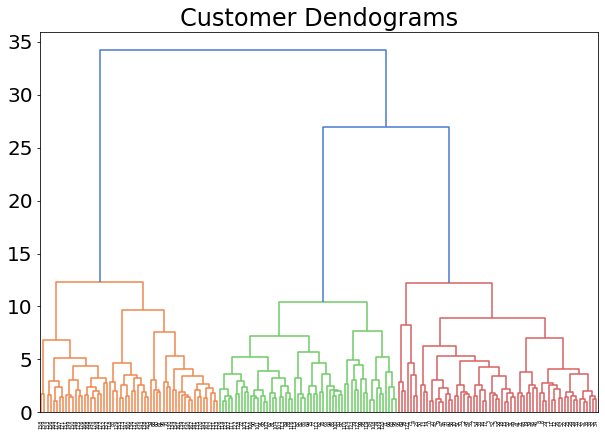

In [15]:
linked = linkage(df_scale, 'single')
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_scale, method='ward'))

In [16]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['cluster'] = pd.DataFrame( cluster.fit_predict(df_scale))
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

merged = pd.concat([df_PCA, df_cluster], axis =1)

Hierarchical clustering을 진행하고 K-Means에서와 같은 방식으로 predict 내용을 저장, 시각화한다

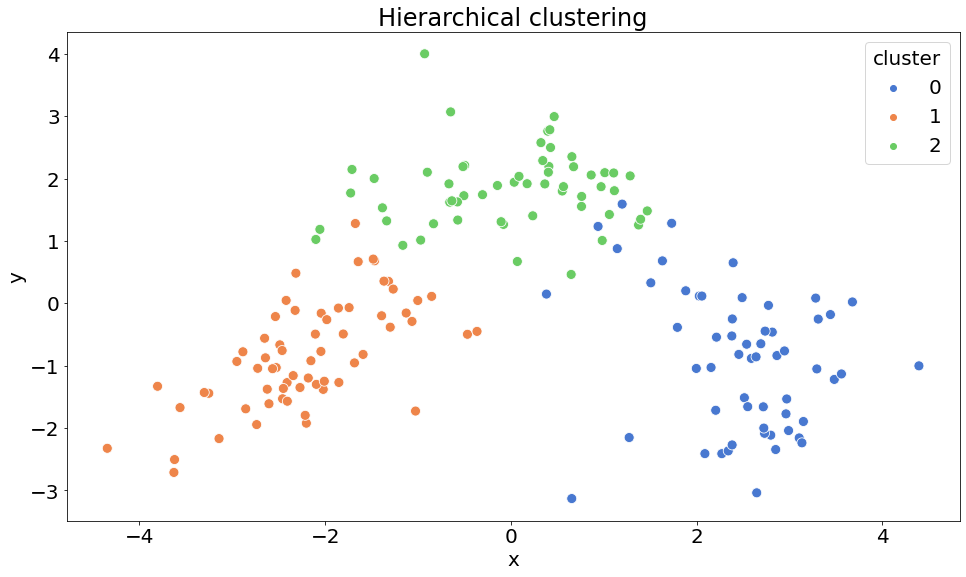

In [17]:
%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('Hierarchical clustering')
plt.show()

In [18]:
score_samples = silhouette_samples(merged, df_cluster)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print("silhoutte score" , " = " , average_score)
merged  = merged.drop('silhoutte_coeff', axis= 1)

silhoutte score  =  0.5873642870266809


Hierarchical clustering 으로 군집화를 진행하는 경우도 K-Means와 유사하며 silhoutte score는 K-Means 보다 소폭 하락한 0.5873642870266809 이다.

### (3) DBSCAN
마지막으로 DBSCAN으로 진행하여 본다.  
이전과 동일하게 데이터를 불러오고, 전처리를 진행해준다

In [19]:
df = pd.read_csv('wine.data', sep=',')
df = df.replace({'Classify': {1:0,2:1,3:2}}) # 1,2,3으로 분류되어 있는 것을 0,1,2로 변환

df_label = df['Classify'] # 라벨을 df_label에 저장하고 

df = df.drop('Classify', axis= 1)# 우리가 사용할 데이터에서 제거

df = df.drop('Ash', axis= 1)
df = df.drop('Nonflavanoid phenols', axis= 1) #설명력이 작은 데이터 삭제

scaler = StandardScaler()   
df_scale = pd.DataFrame(scaler.fit_transform(df)) #표준화 진행

df_for_PCA = pd.DataFrame(df_scale)
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_for_PCA)
df_PCA = pd.DataFrame(df_PCA, columns=["x", "y"])

DBSCAN은 초기 설정값에 의해서 군집의 개수가 자동으로 분류된다. 우선은 eps=2.1,min_samples=15로 진행해 보고자 한다. 

1


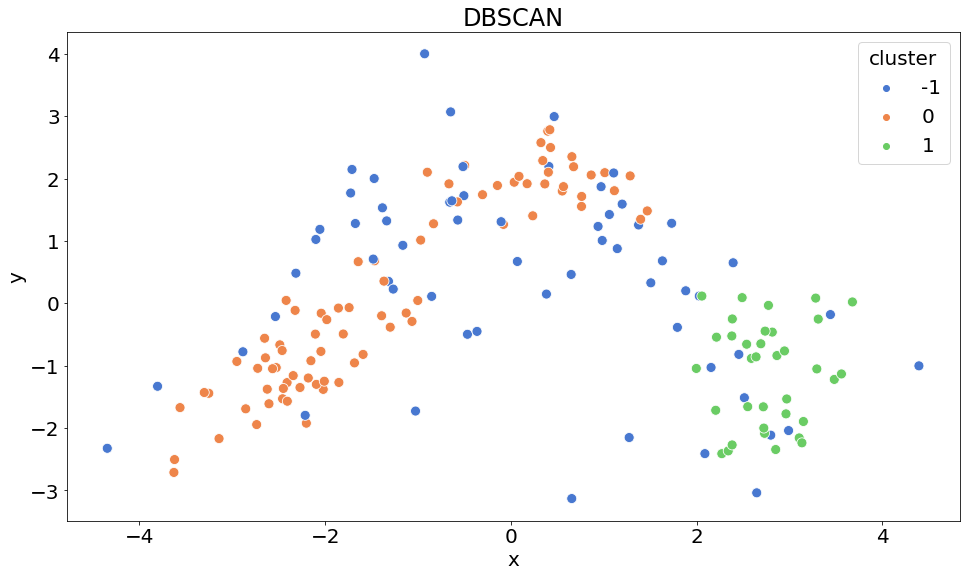

In [20]:
# create model and prediction
model = DBSCAN(eps=2.1,min_samples=15)
predict = pd.DataFrame(model.fit_predict(df_scale))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_scale,predict],axis=1)

print(r['predict'].max())

df['cluster'] = predict
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)

merged = pd.concat([df_PCA, df_cluster], axis =1)


# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=r['predict'].max() + 2),
                    )
plt.title('DBSCAN')
plt.show()


In [21]:
score_samples = silhouette_samples(merged, df_cluster)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print( "silhoutte score = " , average_score)
merged  = merged.drop('silhoutte_coeff', axis= 1)

silhoutte score =  0.2409780577494001


위와 같은 파라미터로 진행했을 경우 2개의 군집으로 나뉜다. 좌측 하단에 있는 군집과, 중앙 상단에 있는 두개의 군집을 분리하기 위해서 min_samples를 조금씩 올려 두 군집을 나누려고 시도하였고, 17일때 나눌 수 있었다.   

2


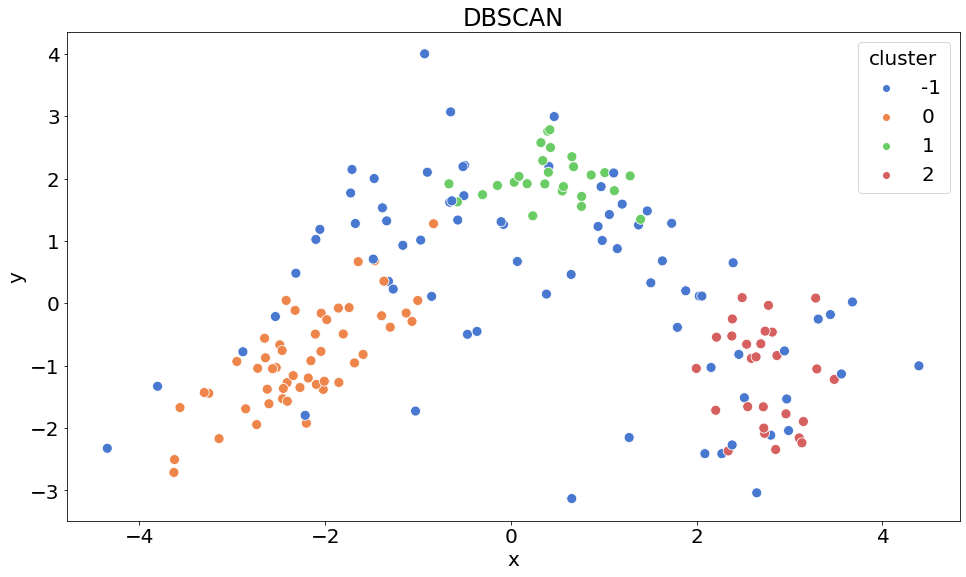

In [22]:
# create model and prediction
model = DBSCAN(eps=2.1,min_samples=17)
predict = pd.DataFrame(model.fit_predict(df_scale))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_scale,predict],axis=1)

print(r['predict'].max())

df['cluster'] = predict
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)

merged = pd.concat([df_PCA, df_cluster], axis =1)


# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=r['predict'].max() + 2),
                    )
plt.title('DBSCAN')
plt.show()

In [23]:
score_samples = silhouette_samples(merged, df_cluster)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print( "silhoutte score = " , average_score)
merged  = merged.drop('silhoutte_coeff', axis= 1)

silhoutte score =  0.38087851072714946


다음과 같이 군집화를 진행한 경우 군집이 3개로 분리되며, 실루엣 스코어가 상승하였다. 추가적으로 이상치를 줄이기 위해서 eps 값을 증가시켜 보았고, eps를 증가시키면 다시 2개의 군집으로 병합되는 것을 확인하였다. 이를 해결하기 위해 다시 min_sample을 늘리는 과정을 반복하였다. 개인적으로 최적의 파라미터 값은 eps=2.5,min_samples=33인 경우인 것 같다.

2


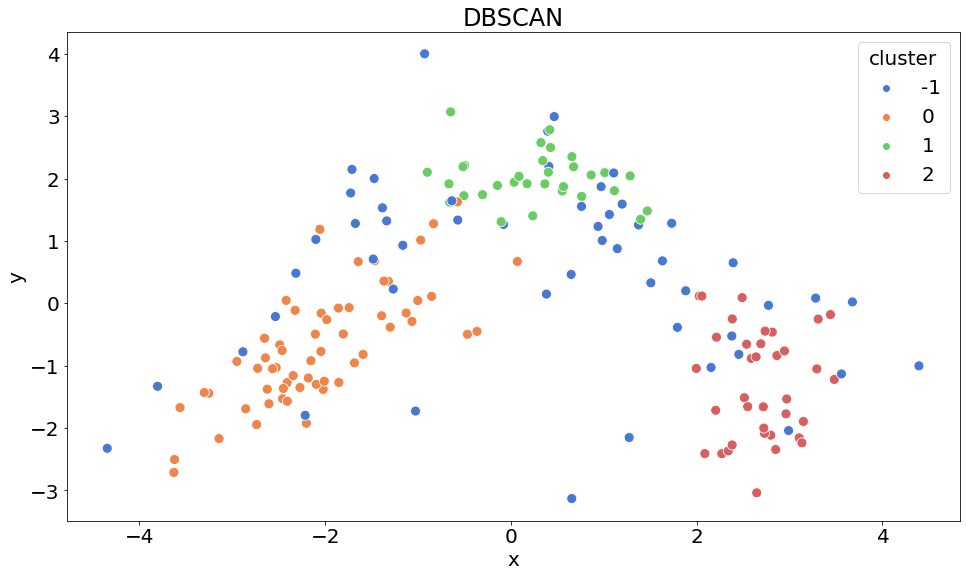

In [24]:
# create model and prediction
model = DBSCAN(eps=2.5,min_samples=33)
predict = pd.DataFrame(model.fit_predict(df_scale))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_scale,predict],axis=1)

print(r['predict'].max())

df['cluster'] = predict
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)

merged = pd.concat([df_PCA, df_cluster], axis =1)


# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=r['predict'].max() + 2),
                    )
plt.title('DBSCAN')
plt.show()

In [25]:
score_samples = silhouette_samples(merged, df_cluster)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print( "silhoutte score = " , average_score)
merged  = merged.drop('silhoutte_coeff', axis= 1)

silhoutte score =  0.42881447451542337


최종적으로 진행한 DBSCAN의 silhoutte score는 0.42881447451542337으로 초기 silhoutte score에 비해 많이 상승한 것을 확인 할 수 있다. 

## 4) 군집화 분석 및 가시화
실제 레이블을 가지고 가시화를 해보면 아래와 같다 

Text(0.5, 1.0, 'Label')

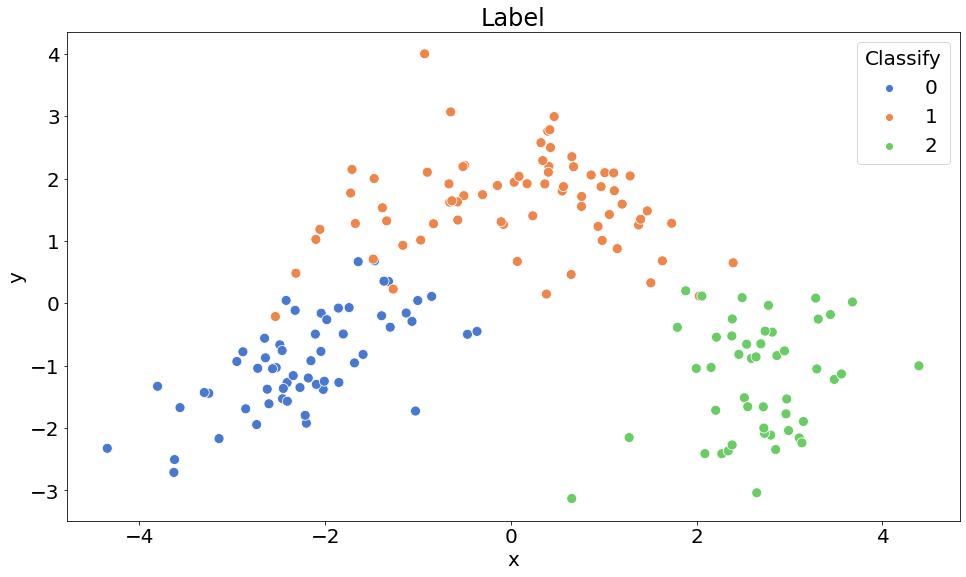

In [26]:
merged = pd.concat([df_PCA, df_label], axis =1)

%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['Classify'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('Label')


아래는 위에서 각각의 방식으로 진행한 군집화의 결과이다
![nn](https://imgur.com/93YNY7h.png)
![nn](https://imgur.com/gzNtqIE.png)
![nn](https://imgur.com/kcTsiTw.png)

결과를 보았을 때 Label을 이용하여 시각화 한 것과, K-Means와 Hierarchical clustering으로 군집화한 것을 비교하면 상당히 유사하다는 것을 확인 할 수 있다.  
다만 해당 데이터에 대해서는 DBSCAN의 위의 두 방법에 비해 적절하지 않아 보이는데, 이는 3개의 군집간의 거리가 멀리 떨어져 있지 않고, 최적의 파라미터를 찾기 어렵기 때문인 것 같다. 추가적으로 변수를 제거하여 PCA를 통해 새로운 축을 만들어 내고, 그결과 군집간의 거리가 유의미하게 차이가 나게 된다면, 더 좋은 성능을 낼 수 있을 것 같다.   

# <font color="blue">2.DecisionTree</font>
## 1) 데이터 수집
- 데이터는 UCI Machine Learning Repisitory의 Estimation of obesity levels based on eating habits and physical condition Data Set
을 사용하였다.(https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)
- 해당 데이터는 식습관과 신체 상태, 및 다양한 지표를 통하여 멕시코, 페루, 콜롬비아 국가에서 개인의 비만 수준을 추정하기 위한 데이터이다. 비만 수준은 저체중, 정상 체중, 과체중I, 과체중II, 비만I, 비만II, 비만III 으로 나뉜다. 

## 2) 데이터 전처리

In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import random
import sys
import sklearn.metrics as mt 
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz/bin'
import graphviz 

- Gender : 성별
- Age : 나이 
- Height : 키(continuous)
- Weight : 몸무게 (continuous)
- family_history_with_overweight : 가족중 과체중 문제를 겪은 사람이 존재하는지 (yes, no)
- FAVC : 고칼로리 음식을 자주 섭취하는지 (yes, no)
- FCVC : 야채를 자주 먹는정도 (0 ~ 3)
- NCP : 주식을 먹는 횟수 (0 ~ 3)
- CAEC : 식사 사이에 음식을 섭취하는 빈도('Sometimes' 'Frequently' 'Always' 'no')
- CH20 : 물을 하루에 얼마나 마시는지(continuous)
- CALC : 술을 자주 마시는지 ('no' 'Sometimes' 'Frequently' 'Always')
- SCC : 칼로리 소모 (yes, no)
- FAF : 신체활동 빈도 (continuous)
- TUE : 기술장치 사용시간 (continuous)
- MTRANS : 주로 사용하는 이동수단 ('Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike')
- NObeyesdad : 비만도 (target)

In [90]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', sep=',')
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

범주형 데이터의 값들을 확인

In [92]:
print(df['family_history_with_overweight'].unique())
print(df['FAVC'].unique())
print(df['CAEC'].unique())
print(df['SMOKE'].unique())
print(df['SCC'].unique()) 
print(df['CALC'].unique())
print(df['MTRANS'].unique())
print(df['NObeyesdad'].unique())


['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


- 해당 데이터에서 대부분의 범주형 변수는 그 값이 참 혹은 거짓이므로 이러한 데이터는 간단하게 참이면 1, 거짓이면 0으로 바꾸어준다.  
- CAEC, CALC 변수의 경우 순서가 존재하므로, ordinary 인코딩을 진행한다
- MTRANS 변수의 경우 순서가 존재하지 않으므로 one-hot 인코딩을 진행한다.
- NObeyesdad 는 범주가 너무 많아 저체중, 정상체중, 과체중, 비만으로 다시 범주화 한다.

In [93]:
df = df.replace({'Gender': {'Male':0,'Female':1}})
df = df.replace({'family_history_with_overweight': {'no':0,'yes':1}})
df = df.replace({'SMOKE': {'no':0,'yes':1}})
df = df.replace({'FAVC': {'no':0,'yes':1}})
df = df.replace({'SCC': {'no':0,'yes':1}})
df = df.replace({'CAEC': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}})
df = df.replace({'CALC': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}})
df = df.replace({'NObeyesdad': {'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':2,
 'Obesity_Type_I':3, 'Obesity_Type_II':3, 'Obesity_Type_III':3}})

df = pd.get_dummies(df, columns = ['MTRANS'])

df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,...,0.045476,1.010298,0.657866,0.731407,2.066793,0.216485,0.003316,0.005211,0.748460,0.026528
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,...,0.208395,0.850592,0.608927,0.515498,1.052549,0.411946,0.057502,0.072015,0.434001,0.160737
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,...,0.000000,0.124505,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,...,0.000000,1.000000,0.625350,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,...,0.000000,1.666678,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,...,1.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


기존 연속형 변수들에 대한 boxPlot은 다음과 같다

Text(0.5, 1.0, 'TUE')

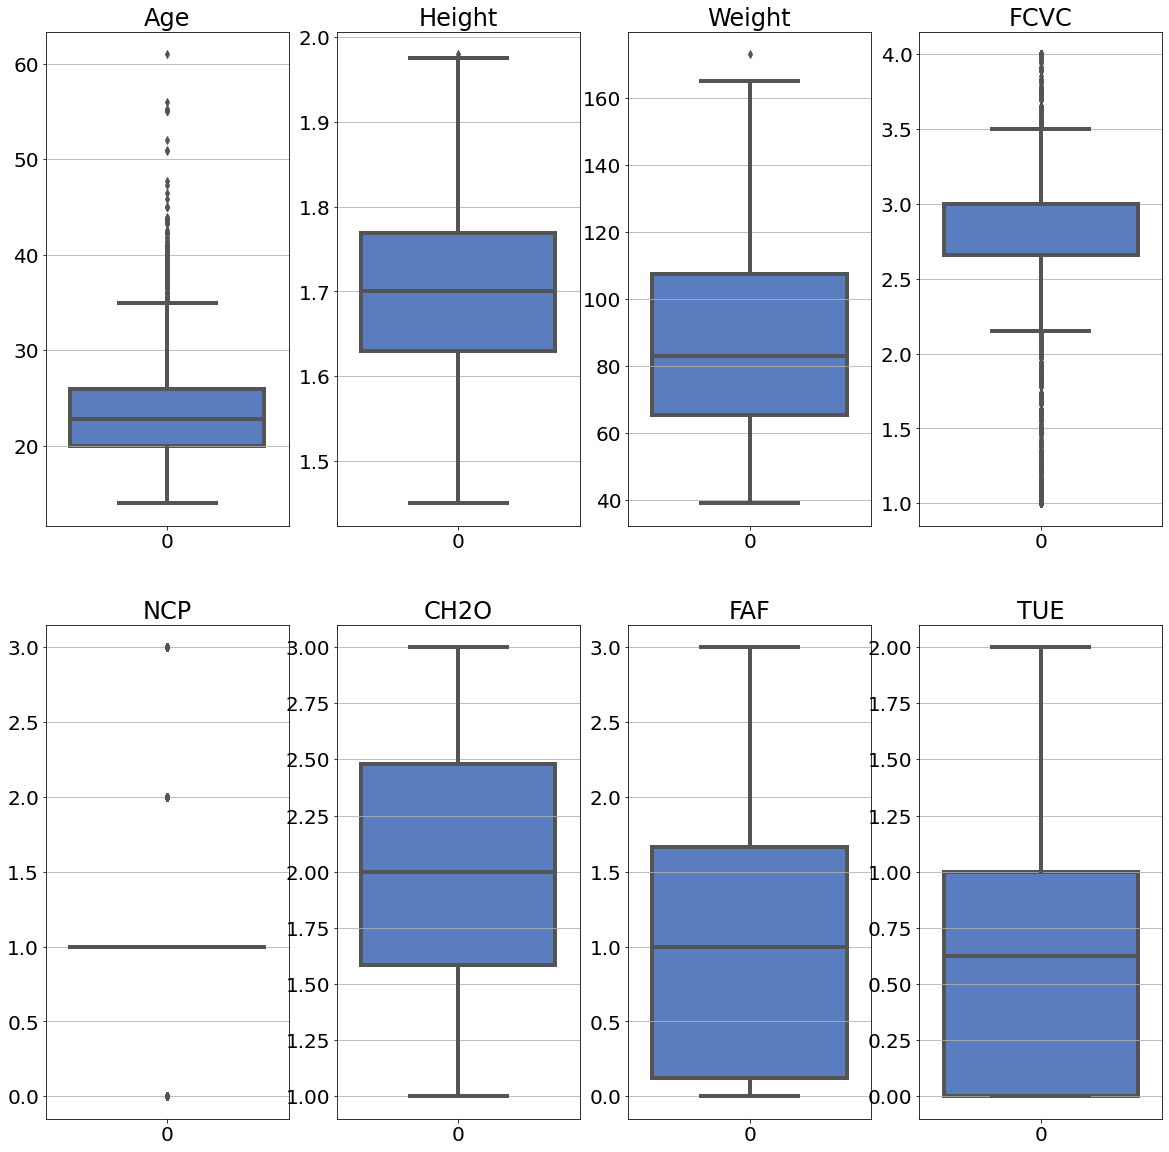

In [106]:

fig, axes = plt.subplots(2, 4)

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

sns.boxplot(data=df.iloc[:,1], ax = axes[0,0])
sns.boxplot(data=df.iloc[:,2], ax = axes[0,1])
sns.boxplot(data=df.iloc[:,3], ax = axes[0,2])
sns.boxplot(data=df.iloc[:,7], ax = axes[0,3])
sns.boxplot(data=df.iloc[:,8], ax = axes[1,0])
sns.boxplot(data=df.iloc[:,10], ax = axes[1,1])
sns.boxplot(data=df.iloc[:,12], ax = axes[1,2])
sns.boxplot(data=df.iloc[:,13], ax = axes[1,3])

axes[0,0].set_title("Age")
axes[0,1].set_title("Height")
axes[0,2].set_title("Weight")
axes[0,3].set_title("FCVC")
axes[1,0].set_title("NCP")
axes[1,1].set_title("CH2O")
axes[1,2].set_title("FAF")
axes[1,3].set_title("TUE")

# sns.boxplot(data=df.iloc[:,1], ax = axes[0,0])
# sns.boxplot(data=df.iloc[:,1], ax = axes[0,0])
# sns.boxplot(data=df.iloc[:,1], ax = axes[0,0])

**이상치 생성**

In [107]:
y = df['NObeyesdad']
x = df.drop('NObeyesdad',axis=1)
y = pd.DataFrame(y)
x = pd.DataFrame(x)

In [108]:
for i in x:
    Q1 = np.percentile(x[i],25)
    Q3 = np.percentile(x[i],75)
    IQR = Q3 - Q1 #IQR 값을 생성
    
    outlierNum = round(len(x) * random.randrange(3,5) / 100) #3~ 5퍼센트 정도의 이상치를 추가
    flag = random.choice([True,False]) #더하기 빼기를 선택
    
    for j in range(outlierNum):
        row = random.randrange(0,len(x)) #랜덤한 순서에 제공
        if flag:
            x[i][row] = Q3 + (1.5)*IQR*(1+ random.random())
        else:
            x[i][row] = Q1 - (1.5)*IQR*(1+ random.random())

Text(0.5, 1.0, 'TUE')

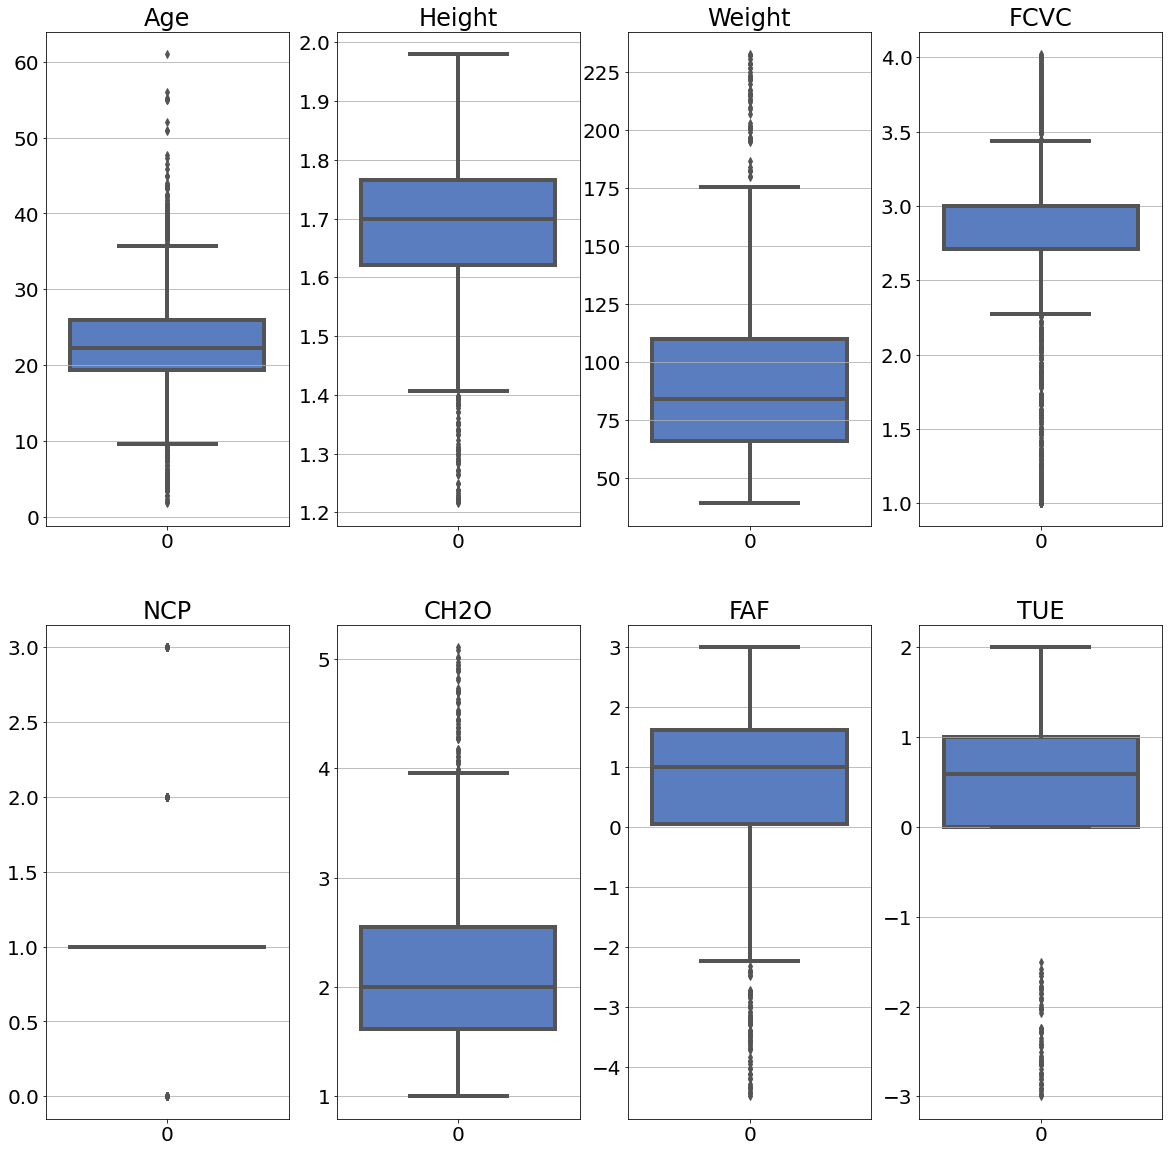

In [109]:
fig, axes = plt.subplots(2, 4)

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

sns.boxplot(data=x.iloc[:,1], ax = axes[0,0])
sns.boxplot(data=x.iloc[:,2], ax = axes[0,1])
sns.boxplot(data=x.iloc[:,3], ax = axes[0,2])
sns.boxplot(data=x.iloc[:,7], ax = axes[0,3])
sns.boxplot(data=x.iloc[:,8], ax = axes[1,0])
sns.boxplot(data=x.iloc[:,10], ax = axes[1,1])
sns.boxplot(data=x.iloc[:,12], ax = axes[1,2])
sns.boxplot(data=x.iloc[:,13], ax = axes[1,3])

axes[0,0].set_title("Age")
axes[0,1].set_title("Height")
axes[0,2].set_title("Weight")
axes[0,3].set_title("FCVC")
axes[1,0].set_title("NCP")
axes[1,1].set_title("CH2O")
axes[1,2].set_title("FAF")
axes[1,3].set_title("TUE")

## 3) 의사결정 나무 구축 및 실험
### (1) 학습, 테스트 데이터 분리 
train과 test의 비율을 7:3으로 정하고, stratify = y 항목을 추가하여 y label의 비율이 train 

In [110]:
seed = 204059
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=seed,  test_size=0.3,shuffle = True,stratify = y)


### (2) 의사결정 나무 모델 구축

In [114]:
dt_clf = DecisionTreeClassifier(random_state=204059)
dt_clf = dt_clf.fit(x_train, y_train) # 학습

### (3) 실험 및 비교
test data set을 가지고 성능을 비교해보자

In [117]:
y_pred = dt_clf.predict(x_test) 

In [118]:
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average= 'micro')
precision = mt.precision_score(y_test, y_pred, average= 'micro')
f1_score = mt.f1_score(y_test, y_pred, average= 'micro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9384858044164038 

Accuracy:  0.94 

Recall:  0.94 

Precision:  0.94 

F1_score:  0.94 

Confusion Matrix: 
 [[ 75   7   0   0]
 [  6  72   5   3]
 [  0   3 165   6]
 [  0   2   7 283]]


해당 모델의 Test_Accuracy 는 0.9384858044164038 이다. 

교차 검증을 진행하면 아래와 같다.

In [119]:
# 교차검증

y = df['NObeyesdad']
x = df.drop('NObeyesdad',axis=1)

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9337378015304807


In [120]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.013668,0.002387,0.813239
1,0.012125,0.002656,0.971564
2,0.011463,0.002734,0.959716
3,0.011910,0.002717,0.947867
4,0.010588,0.002002,0.976303


#### prunning을 진행하여 보자. prunning을 어디까지 제한하여야 할지 모름으로, 각각의 정확도를 비교하여 최적의 max_depth를 찾아보자 

In [121]:
optimal_acc = 0 
optimal_depth = 0

for i in range(1,dt_clf.tree_.max_depth + 1):
    pruned_dt_clf = DecisionTreeClassifier(max_depth= i, random_state=156) # max_depth=3으로 제한
    pruned_dt_clf = pruned_dt_clf.fit(x_train, y_train)
    if pruned_dt_clf.score(x_test, y_test) >= optimal_acc:
        optimal_acc = pruned_dt_clf.score(x_test, y_test)
        optimal_depth = i
    print("Accuracy of training set (max_depth = ", i , ") : ", pruned_dt_clf.score(x_train, y_train) )
    print("Accuracy of training set (max_depth = ", i , ") : ", pruned_dt_clf.score(x_test, y_test) )
    print()
    
print("Optimal max_depth = ", optimal_depth)

Accuracy of training set (max_depth =  1 ) :  0.6330399458361544
Accuracy of training set (max_depth =  1 ) :  0.6419558359621451

Accuracy of training set (max_depth =  2 ) :  0.7508463100880163
Accuracy of training set (max_depth =  2 ) :  0.7634069400630915

Accuracy of training set (max_depth =  3 ) :  0.7928232904536222
Accuracy of training set (max_depth =  3 ) :  0.8217665615141956

Accuracy of training set (max_depth =  4 ) :  0.8422477995937712
Accuracy of training set (max_depth =  4 ) :  0.8422712933753943

Accuracy of training set (max_depth =  5 ) :  0.922816519972918
Accuracy of training set (max_depth =  5 ) :  0.9069400630914827

Accuracy of training set (max_depth =  6 ) :  0.950575490859851
Accuracy of training set (max_depth =  6 ) :  0.9211356466876972

Accuracy of training set (max_depth =  7 ) :  0.969532836831415
Accuracy of training set (max_depth =  7 ) :  0.9400630914826499

Accuracy of training set (max_depth =  8 ) :  0.983073798239675
Accuracy of training s

실험 결과를 확인해 보면 max_depth가 10인경우에 test data set에 대하여 0.9416403785488959의 정확도를 보여준다. 

## 4) 의사결정 나무 학습모델 가시화 및 설명

In [122]:
pruned_dt_clf = DecisionTreeClassifier(max_depth= optimal_depth, random_state=156) # max_depth=3으로 제한
pruned_dt_clf = pruned_dt_clf.fit(x_train, y_train)

export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = 'NObeyesdad', feature_names = x.columns, 
                impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


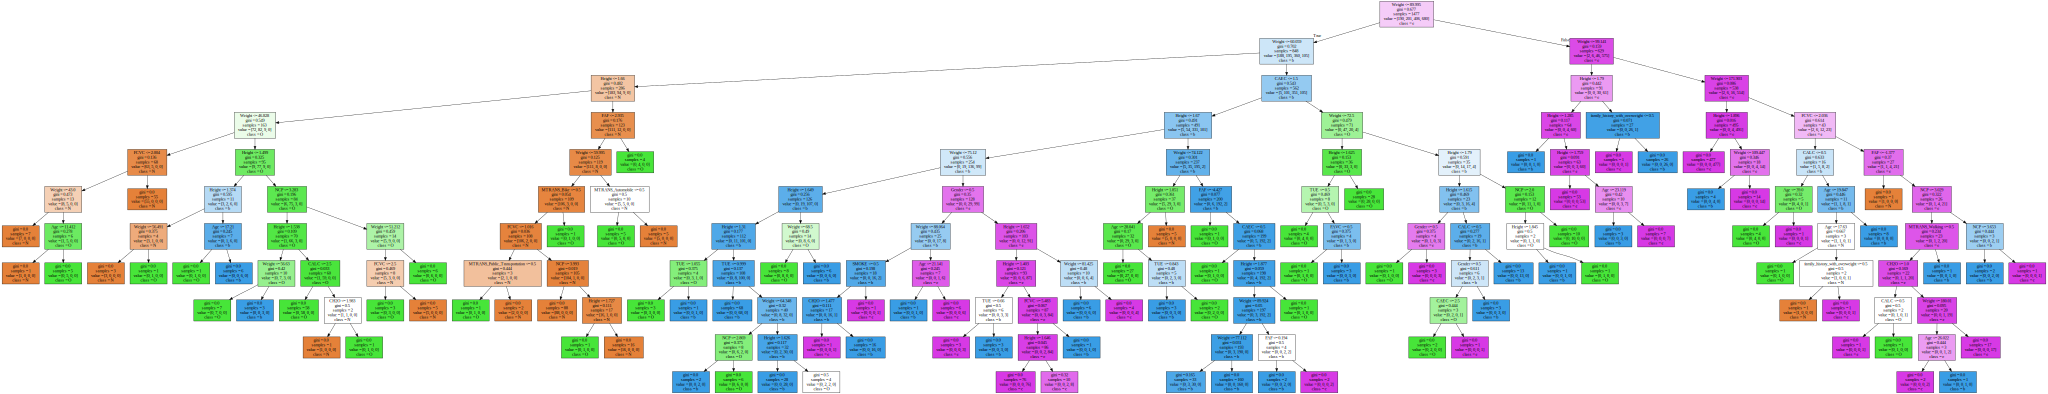

In [123]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 의사결정 나무의 특징

의사결정 나무는 Explainable 하다는 것이 가장 큰 특징인 것 같다. 다른 모델들은 모델을 만드는 본인도 어떤 과정을 통해서 모델이 결론을 도출해 내는지를 설명하는 것이 어려운 반면, 의사결정 나무는 결정과정을 모두 보여주기 때문에 다른 모델들에 비해 설명에 용이 한것 같다.
또한 의사결정 나무는 이상치에 크게 민감하지 않은 것 같다. 이는 의사결정을 하는 과정에서 기준보다 작은지, 큰지 등과 같은 좀 더 큰 기준으로 결론을 도출하기 때문에 이상치에 큰 영향을 받지 않는다.   
본 데이터에 대해서는 애초에 depth 값이 크지 않아 모든값을 확인하여 최적의 값을 도출하였다. Train data에 너무 과적합 되어 있는경우 너무 세부적인 부분까지 모델이 설명하려는 경향이 생긴다. 따라서 Prunning은 이러한 과적합을 제거하여 기존의 설명력을 유지하는 선에서 보다 보편적인 데이터에 적용할 수 있는 수준으로 진행하는 것이 좋을 것 같다.